# Model performance evaluation

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Specifying a file path and reading the file

In [ ]:
json_file_path = "C:\Dev\corner_detection_evaluation\deviation.json"
df = pd.read_json(json_file_path)

## Reading the first ten recordings

In [ ]:
df.head(10)

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029
5,Wohnzimmer,4,4,18.201964,30.170499,9.929660,18.091045,28.885998,9.929660,18.312884,30.170499,9.932862
6,Büro,6,6,4.155999,6.492000,0.338442,4.036335,6.347297,0.338442,4.275663,6.492000,0.436603
7,Flur,6,6,0.728829,1.781801,0.210813,0.695057,1.756475,0.210813,0.762602,1.781801,0.240982
8,Flur,4,4,15.445758,55.451122,0.034334,0.363172,0.655042,0.034334,30.528344,55.451122,11.313012
9,Eingangsbereich,4,4,19.379779,41.845995,0.179151,0.759095,1.373219,0.179151,38.000463,41.845995,33.773640


## Defining class and its methods for plotting histograms of deviation data for different rooms.

In [25]:
class Plotter:
    def __init__(self, output_folder="plots"):
        self.output_folder = output_folder
        os.makedirs(self.output_folder, exist_ok=True)
        
    def plot_histograms(self, df, columns_to_compare, max_rooms=None):
        plot_paths = []

        # Get unique room names
        room_names = df['name'].unique()

        # If max_rooms is specified,
        # limit the number of rooms to show
        if max_rooms is not None:
            room_names = room_names[:max_rooms]

        # Iterate through each room and create
        # a histogram for the specified columns
        for room_name in room_names:
            # Extract data for the current room
            room_data = df[df['name'] == room_name].iloc[0]

            # Create a figure and axis
            plt.figure(figsize=(10, 6))
            ax = plt.subplot()

            # Plot the histogram for each column
            for column in columns_to_compare:
                ax.hist(room_data[column], bins=20, alpha=0.5, label=column)

            # Add labels and title
            plt.xlabel('Deviation (degrees)')
            plt.ylabel('Frequency')
            plt.title(
                f'Distribution of {", ".join(columns_to_compare)} -'
                f'{room_name}'
            )

            # Add legend
            plt.legend()
            # Show histogram           
            plt.show()
        


##  Executing the script

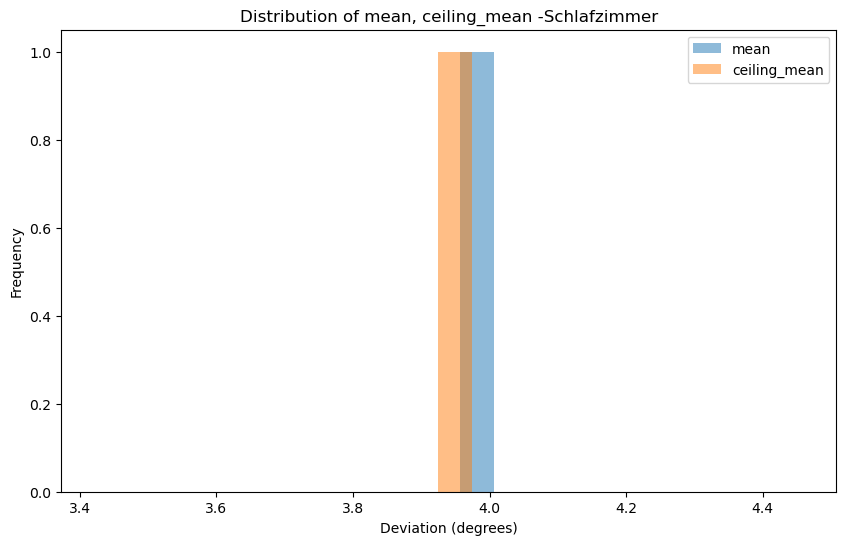

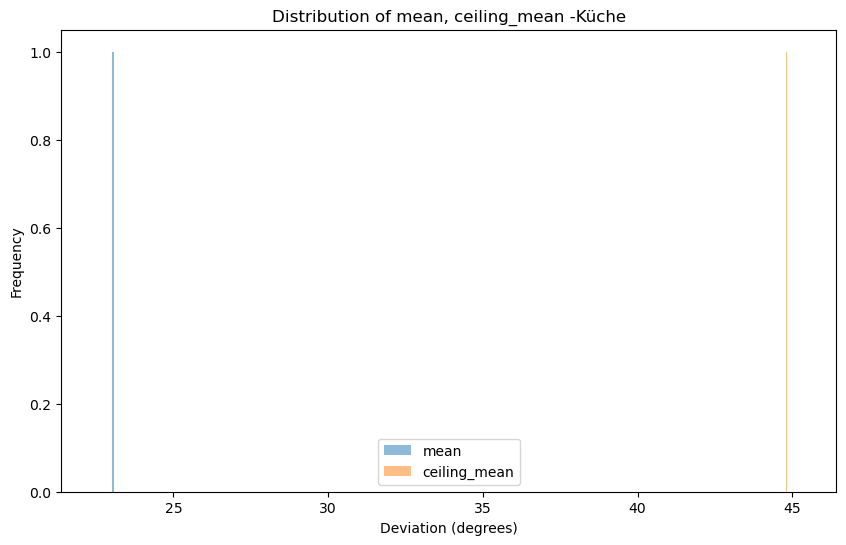

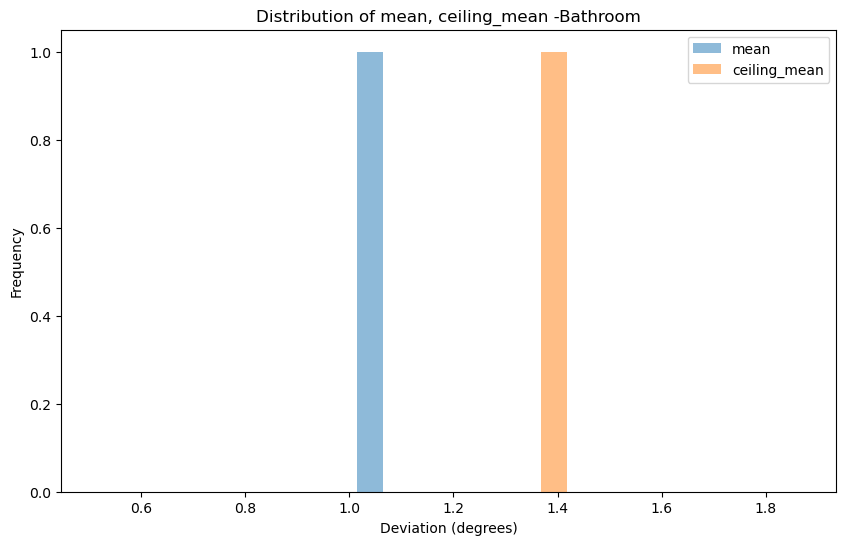

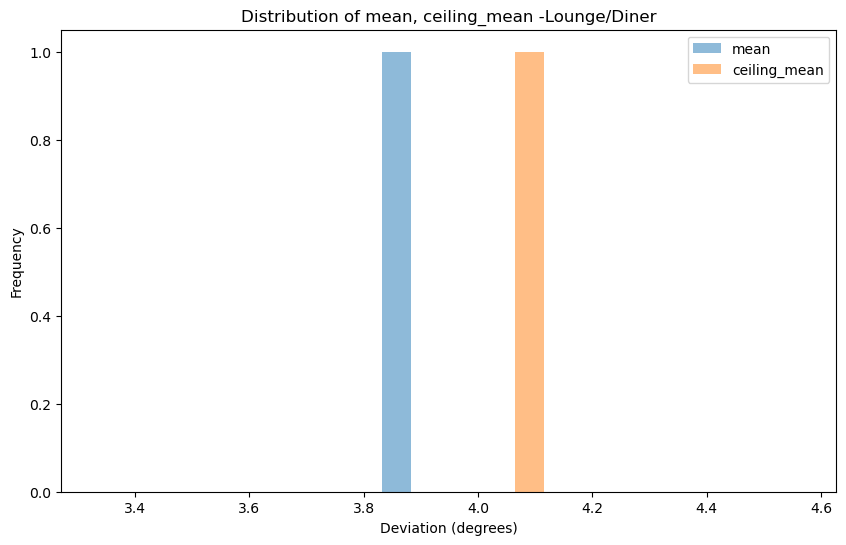

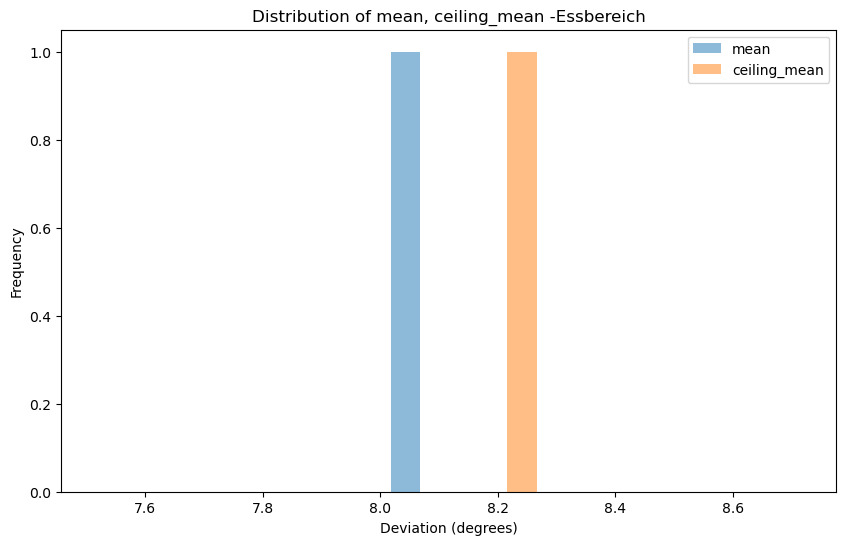

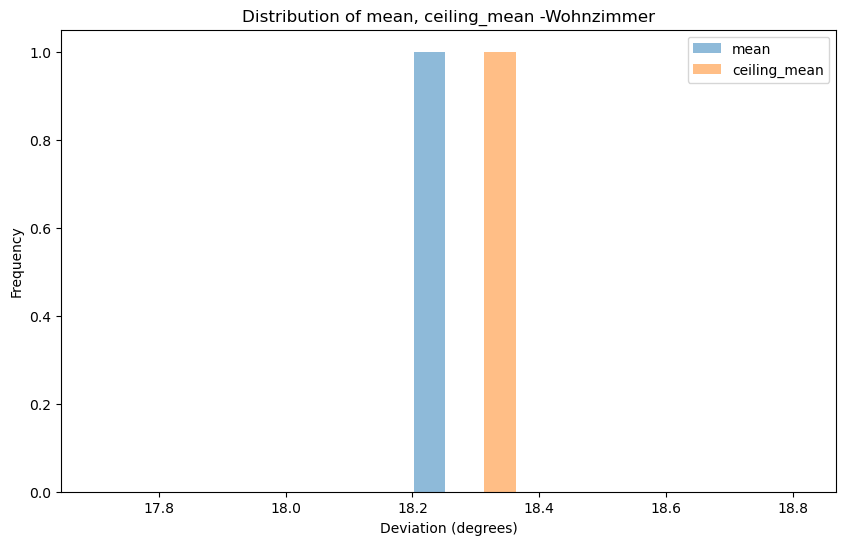

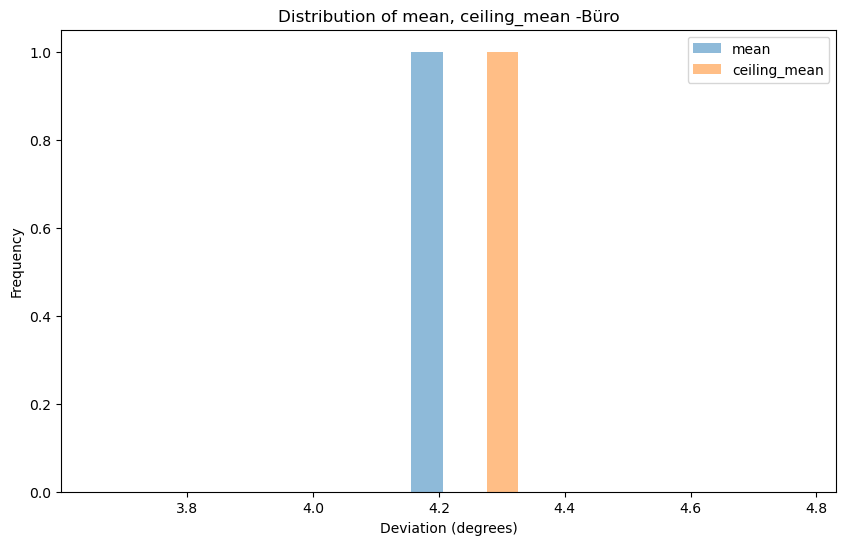

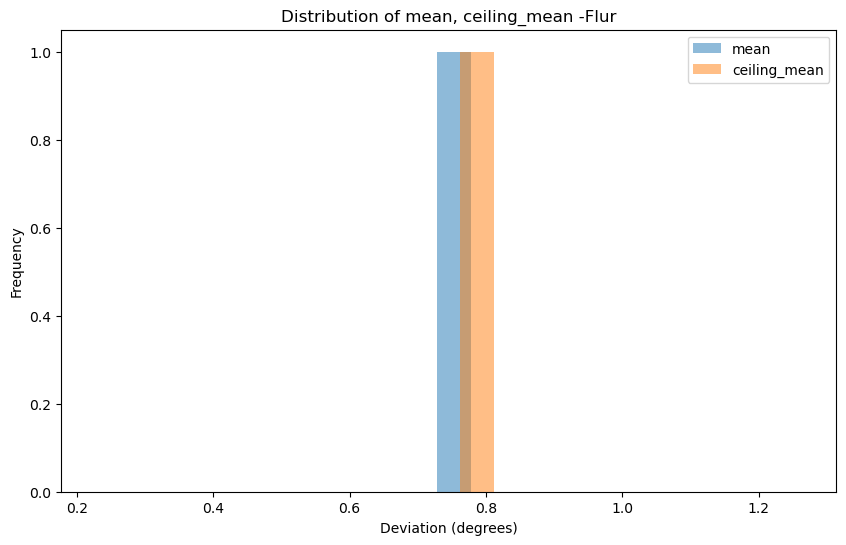

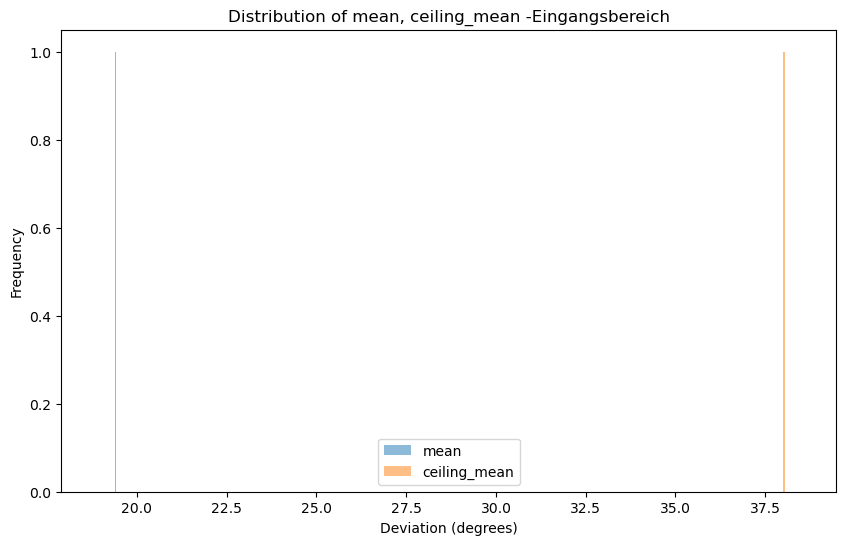

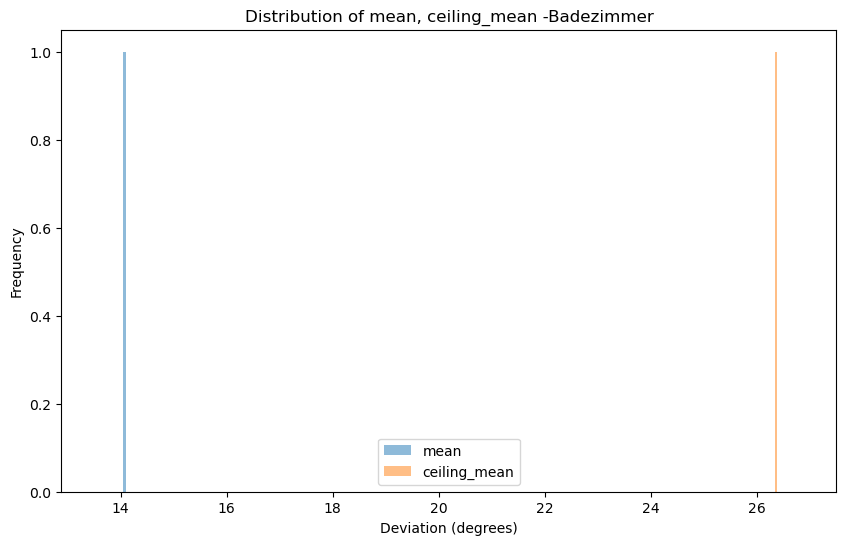

In [28]:
if __name__ == "__main__":
    json_file_path = "C:\Dev\corner_detection_evaluation\deviation.json"
    # Read JSON file as a pandas DataFrame
    df = pd.read_json(json_file_path)

    # Columns to compare (for example)
    columns_to_compare = ['mean', 'ceiling_mean']

    # Create a Plotter instance
    plotter = Plotter()

    # Draw plots for a maximum of 10 rooms
    max_rooms = 10
    plot_paths = plotter.plot_histograms(df, columns_to_compare, max_rooms)

# Conclusion

Comparative histograms were created for the following columns (as in example): 'mean' and 'ceiling_mean', overlaying them for visual inspection. This facilitated a clear understanding of differences in the distribution of deviations. 


In the majority of cases, the model provides predictions fairly accurately, with slight discrepancies. However, noticeable differences are observed, as exemplified in the case of Küche and Eingangsbereich. The reasons behind these discrepancies warrant further investigation.